#Credit Card Fraud Detection

In this notebook, a model is built to detect fraudulent credit card transactions using a dataset containing transaction details. Preprocessing steps include handling missing values and scaling features. We use algorithms like Logistic Regression,  and Random Forests for classification. The dataset is split into training and testing sets to evaluate model performance. Metrics like accuracy, precision, recall, and the F1 score are used to assess the models. Hyperparameter tuning is performed to optimize model performance. Finally, the best-performing model is selected based on evaluation metrics to detect fraudulent transactions effectively.

#Import dependencies


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Data Loading

In [60]:
df_train = pd.read_csv("fraudTrain.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<ipython-input-62-ec486fe15a8c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Column', x='Non-Null Count', data=df_info, palette='viridis', ax=ax)


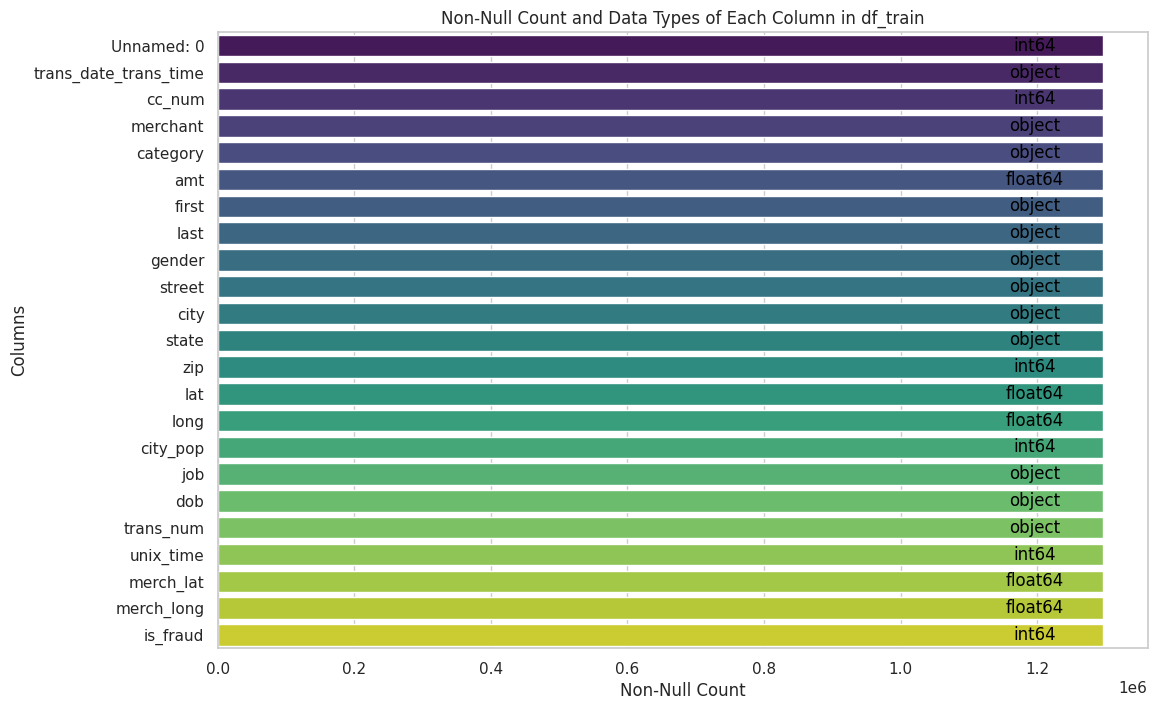

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Column': ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
               'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
               'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
    'Non-Null Count': [1296675, 1296675, 1296675, 1296675, 1296675, 1296675,
                       1296675, 1296675, 1296675, 1296675, 1296675, 1296675, 1296675,
                       1296675, 1296675, 1296675, 1296675, 1296675, 1296675, 1296675,
                       1296675, 1296675, 1296675],
    'Dtype': ['int64', 'object', 'int64', 'object', 'object', 'float64',
              'object', 'object', 'object', 'object', 'object', 'object', 'int64',
              'float64', 'float64', 'int64', 'object', 'object', 'object', 'int64',
              'float64', 'float64', 'int64']
}


df_info = pd.DataFrame(data)


sns.set(style="whitegrid")


fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y='Column', x='Non-Null Count', data=df_info, palette='viridis', ax=ax)


ax.set_title('Non-Null Count and Data Types of Each Column in df_train')
ax.set_xlabel('Non-Null Count')
ax.set_ylabel('Columns')


for index, row in df_info.iterrows():
    ax.text(row['Non-Null Count'] - 100000, index, row['Dtype'], color='black', ha="center", va="center")


plt.show()



In [63]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


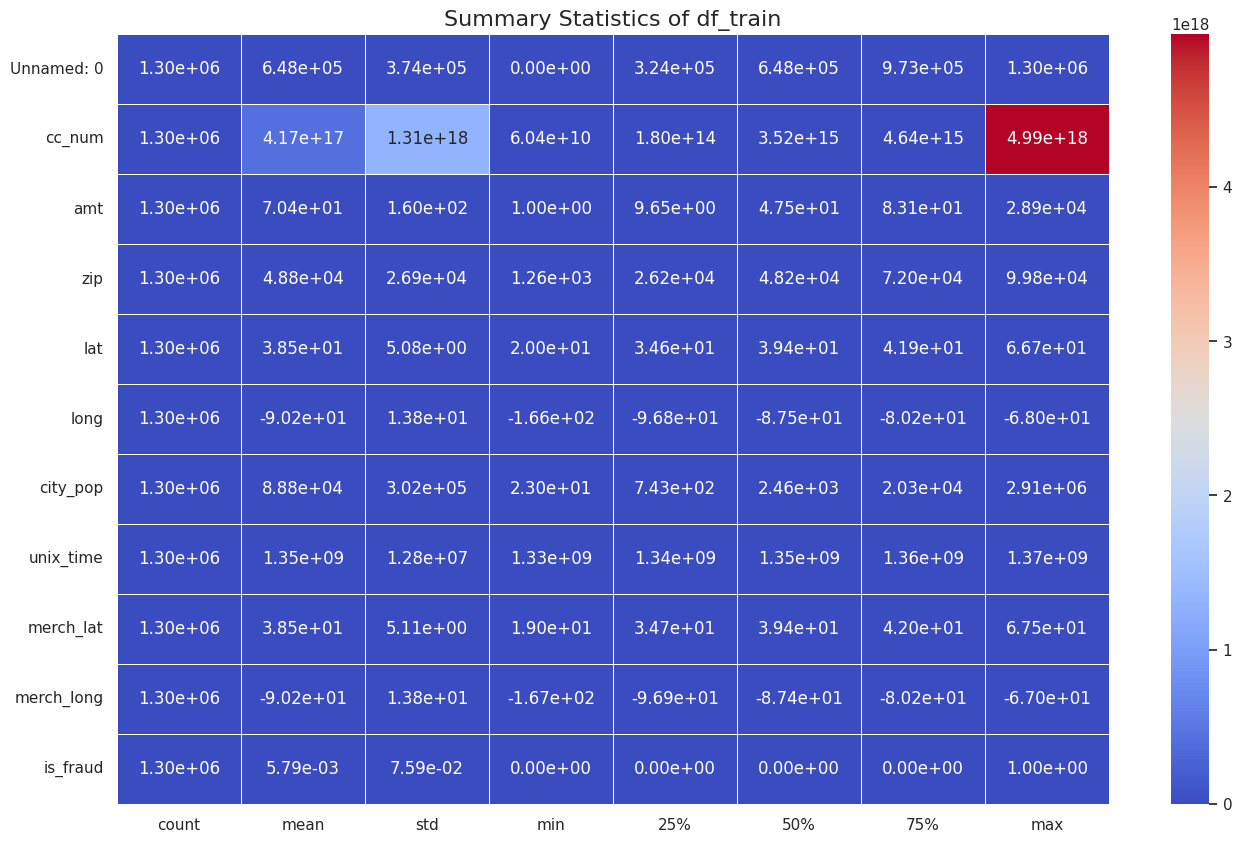

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Unnamed: 0': [1.296675e+06, 6.483370e+05, 3.743180e+05, 0.000000e+00, 3.241685e+05, 6.483370e+05, 9.725055e+05, 1.296674e+06],
    'cc_num': [1.296675e+06, 4.171920e+17, 1.308806e+18, 6.041621e+10, 1.800429e+14, 3.521417e+15, 4.642255e+15, 4.992346e+18],
    'amt': [1.296675e+06, 7.035104e+01, 1.603160e+02, 1.000000e+00, 9.650000e+00, 4.752000e+01, 8.314000e+01, 2.894890e+04],
    'zip': [1.296675e+06, 4.880067e+04, 2.689322e+04, 1.257000e+03, 2.623700e+04, 4.817400e+04, 7.204200e+04, 9.978300e+04],
    'lat': [1.296675e+06, 3.853762e+01, 5.075808e+00, 2.002710e+01, 3.462050e+01, 3.935430e+01, 4.194040e+01, 6.669330e+01],
    'long': [1.296675e+06, -9.022634e+01, 1.375908e+01, -1.656723e+02, -9.679800e+01, -8.747690e+01, -8.015800e+01, -6.795030e+01],
    'city_pop': [1.296675e+06, 8.882444e+04, 3.019564e+05, 2.300000e+01, 7.430000e+02, 2.456000e+03, 2.032800e+04, 2.906700e+06],
    'unix_time': [1.296675e+06, 1.349244e+09, 1.284128e+07, 1.325376e+09, 1.338751e+09, 1.349250e+09, 1.359385e+09, 1.371817e+09],
    'merch_lat': [1.296675e+06, 3.853734e+01, 5.109788e+00, 1.902779e+01, 3.473357e+01, 3.936568e+01, 4.195716e+01, 6.751027e+01],
    'merch_long': [1.296675e+06, -9.022646e+01, 1.377109e+01, -1.666712e+02, -9.689728e+01, -8.743839e+01, -8.023680e+01, -6.695090e+01],
    'is_fraud': [1.296675e+06, 5.788652e-03, 7.586269e-02, 0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00]
}


columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
df_describe = pd.DataFrame(data, index=columns)


df_describe = df_describe.T


plt.figure(figsize=(16, 10))
plt.title('Summary Statistics of df_train', fontsize=16)


sns.heatmap(df_describe, annot=True, fmt=".2e", cmap='coolwarm', cbar=True, linewidths=0.5)


plt.show()



In [65]:
df_test = pd.read_csv("fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


#Data Pre-Processing

In [66]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

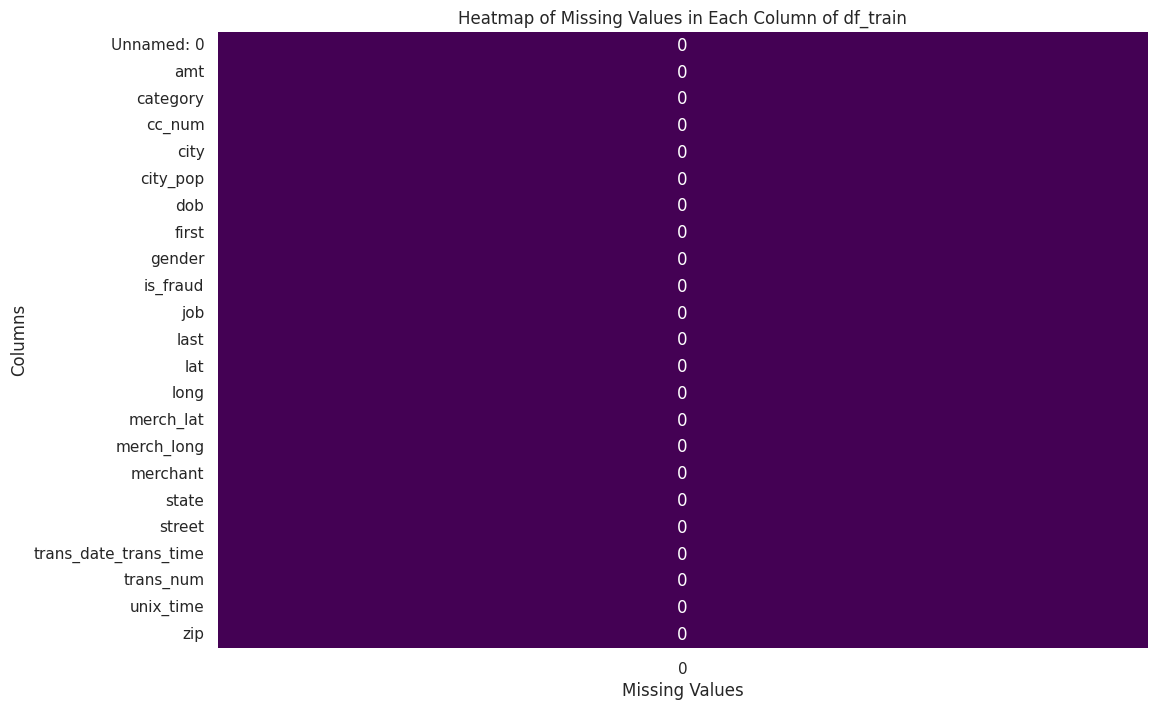

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Unnamed: 0': 0,
    'trans_date_trans_time': 0,
    'cc_num': 0,
    'merchant': 0,
    'category': 0,
    'amt': 0,
    'first': 0,
    'last': 0,
    'gender': 0,
    'street': 0,
    'city': 0,
    'state': 0,
    'zip': 0,
    'lat': 0,
    'long': 0,
    'city_pop': 0,
    'job': 0,
    'dob': 0,
    'trans_num': 0,
    'unix_time': 0,
    'merch_lat': 0,
    'merch_long': 0,
    'is_fraud': 0
}


df_missing = pd.DataFrame(list(data.items()), columns=['Column', 'Missing Values'])


sns.set(style="whitegrid")


fig, ax = plt.subplots(figsize=(12, 8))

heatmap_data = df_missing.pivot(index="Column", columns="Missing Values", values="Missing Values")
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='viridis', cbar=False, ax=ax)


ax.set_title('Heatmap of Missing Values in Each Column of df_train')
ax.set_xlabel('Missing Values')
ax.set_ylabel('Columns')


plt.show()



In [68]:
# Removing Unnamed: 0 Columns
df_train.drop(columns = "Unnamed: 0",inplace = True)
df_test.drop(columns = "Unnamed: 0",inplace = True) # Drop the column once
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

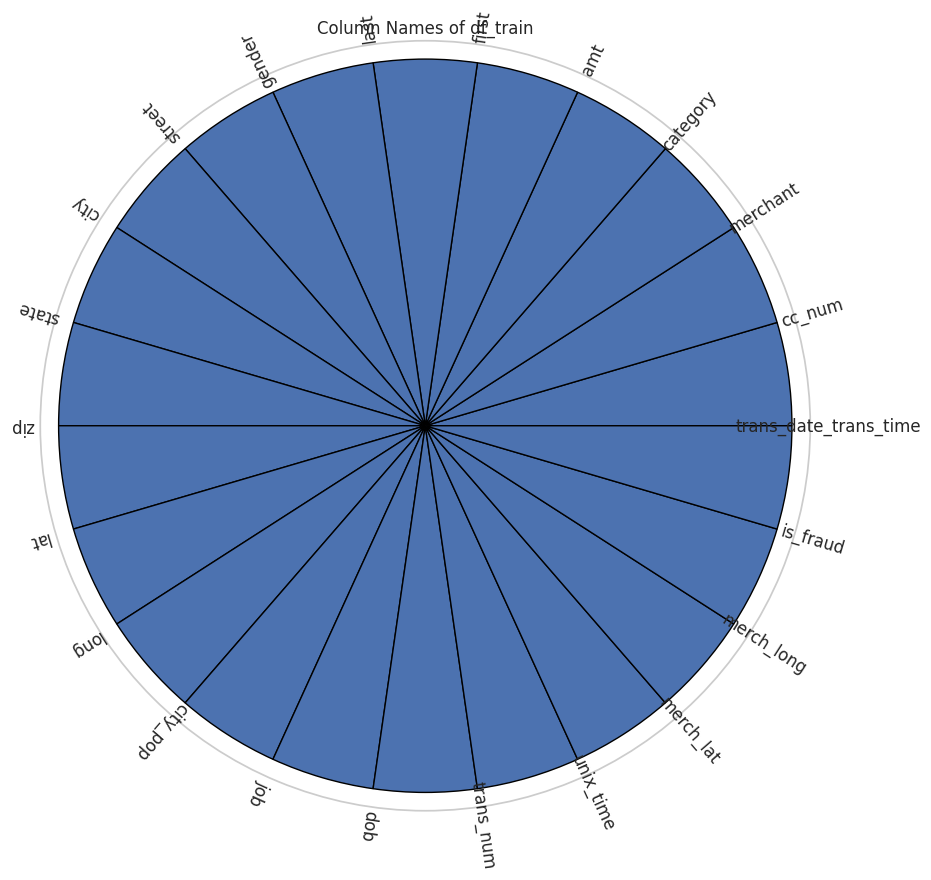

In [69]:


columns = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


df_columns = pd.DataFrame(columns, columns=['Column Names'])


num_vars = len(columns)


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()


width = 2 * np.pi / num_vars


fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

bars = ax.bar(angles, [1] * num_vars, width=width, align='edge', edgecolor='black')


for bar, angle, label in zip(bars, angles, columns):
    ax.text(
        x=angle,
        y=bar.get_height() + 0.1,
        s=label,
        ha='center',
        va='center',
        rotation=angle * 180 / np.pi,
        rotation_mode='anchor'
    )

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Add title
plt.title('Column Names of df_train')

# Show the plot
plt.show()



In [70]:
df_train["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [71]:
df_train["dob"] = pd.to_datetime(df_train["dob"])
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

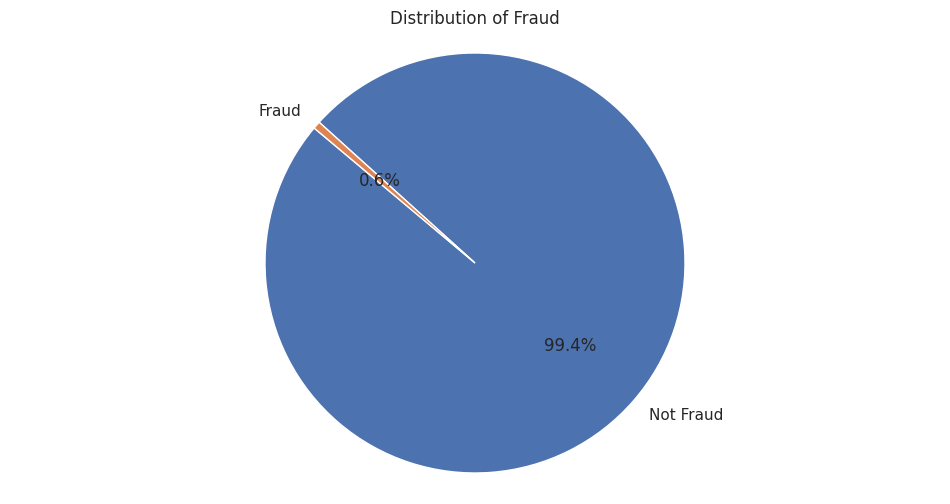

In [72]:
plt.figure(figsize = (12,6))
labels = ["Not Fraud","Fraud"]
values = df_train.is_fraud.value_counts()
plt.pie(values,labels = labels,autopct = "%1.1f%%",startangle = 140)
plt.title("Distribution of Fraud")
plt.axis("equal")
plt.show()

In [73]:
df_train[df_train["is_fraud"] == 1]["job"].value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: count, Length: 443, dtype: int64

<ipython-input-74-3c23b757595f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_job_title_df, x="count", y="job",palette="viridis",dodge=False)


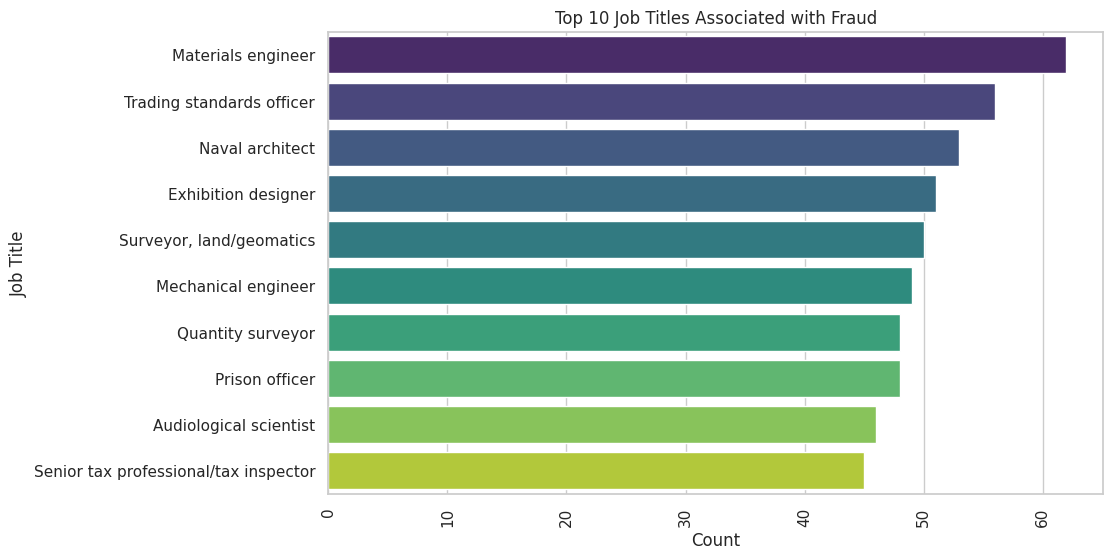

In [74]:
# Extract top 10 job titles associated with fraud and their counts
fraud_job_title = df_train[df_train["is_fraud"] == 1]["job"].value_counts().head(10)

# Convert to a DataFrame for easier plotting
fraud_job_title_df = fraud_job_title.reset_index()
fraud_job_title_df.columns = ['job', 'count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_job_title_df, x="count", y="job",palette="viridis",dodge=False)
plt.title('Top 10 Job Titles Associated with Fraud')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.xticks(rotation=90)
plt.show()

In [75]:
df_train["category"].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

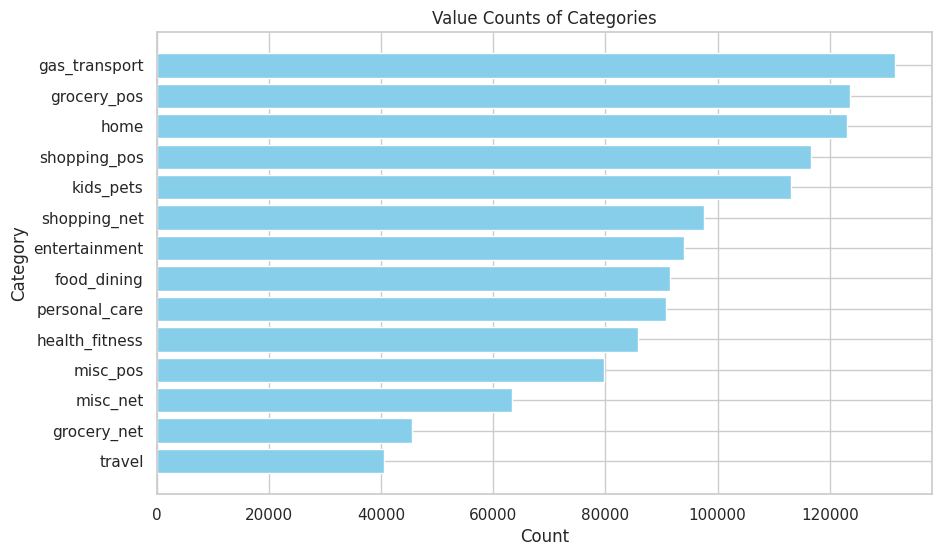

In [76]:
import matplotlib.pyplot as plt


categories = ['gas_transport', 'grocery_pos', 'home', 'shopping_pos', 'kids_pets',
              'shopping_net', 'entertainment', 'food_dining', 'personal_care',
              'health_fitness', 'misc_pos', 'misc_net', 'grocery_net', 'travel']
counts = [131659, 123638, 123115, 116672, 113035, 97543, 94014, 91461, 90758, 85879,
          79655, 63287, 45452, 40507]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Value Counts of Categories')
plt.gca().invert_yaxis()  # Invert y-axis to display categories from top to bottom
plt.show()


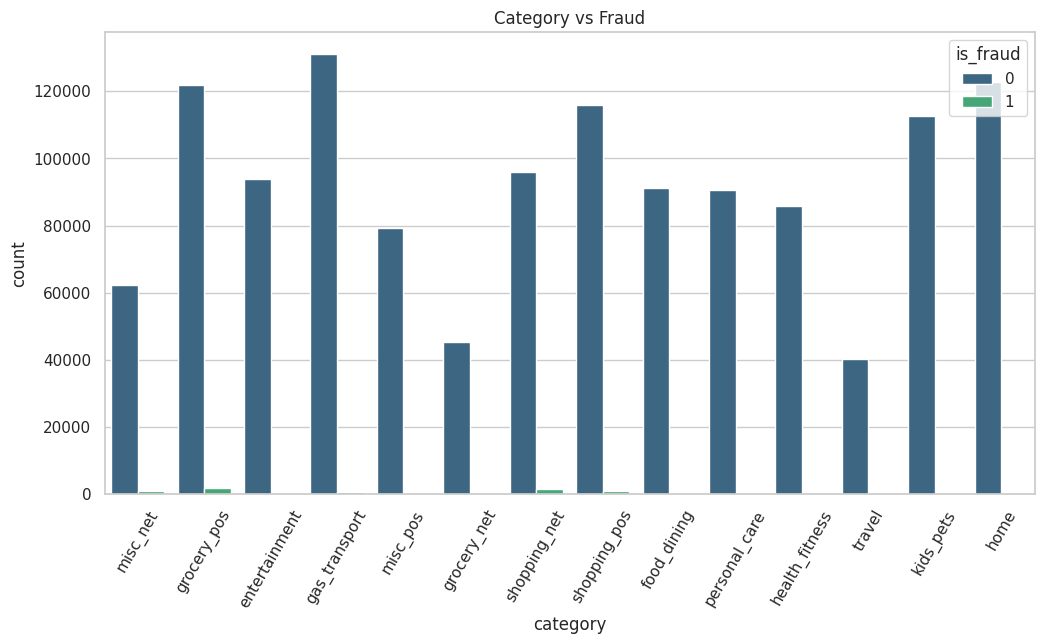

In [77]:
plt.figure(figsize = (12,6))
sns.countplot(x = "category",hue = "is_fraud",data = df_train,palette = "viridis")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

#Category vs Fraud

<ipython-input-78-33a761943153>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")


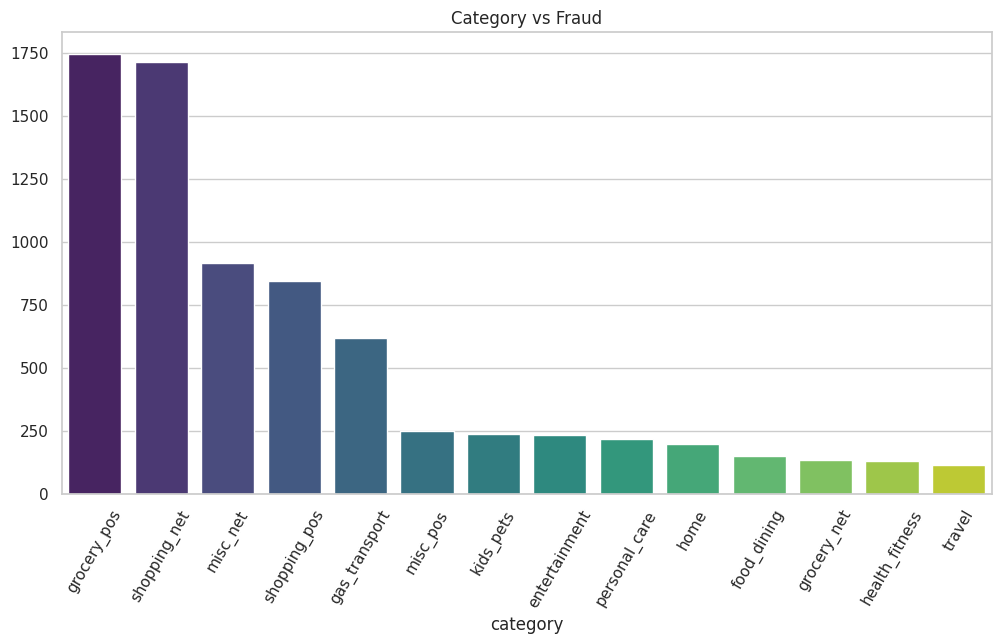

In [78]:
plt.figure(figsize = (12,6))
fraud_category = df_train[df_train["is_fraud"] == 1]["category"].value_counts()
sns.barplot(x = fraud_category.index,y = fraud_category.values, palette = "viridis")
plt.title("Category vs Fraud")
plt.xticks(rotation = 60)
plt.show()

In [79]:
df_train["city"].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Karns City        7
Bruce             7
Claypool          7
Streator          7
Vacaville         7
Name: count, Length: 894, dtype: int64

#Distribution of Transaction Amounts

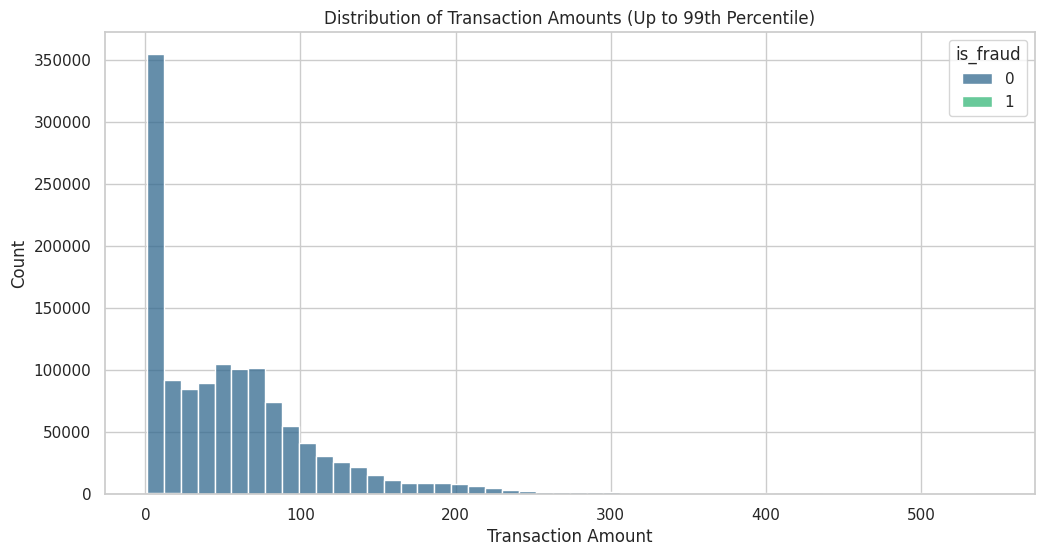

In [80]:
# Calculate the 99th percentile for the 'amt' column
amt_99 = df_train['amt'].quantile(0.99)
plt.figure(figsize=(12, 6))
sns.histplot(data= df_train[ df_train['amt'] <= amt_99], x="amt", hue="is_fraud", multiple="stack", bins=50, palette="viridis")
plt.title('Distribution of Transaction Amounts (Up to 99th Percentile)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

#Fraud Rate by State

<ipython-input-81-71b95722ce15>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate_by_state, x='is_fraud', y='state', palette='viridis')


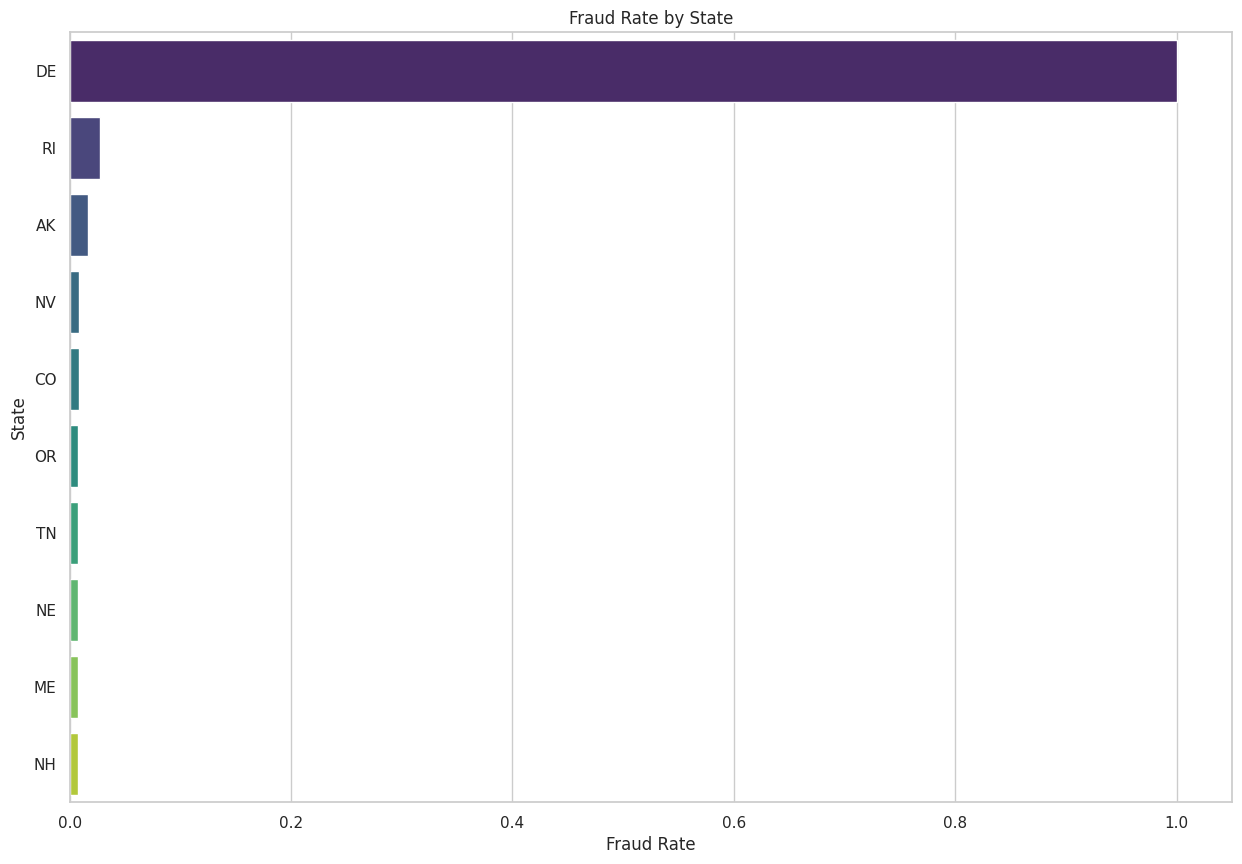

In [81]:
fraud_rate_by_state = df_train.groupby('state')['is_fraud'].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(15, 10))
sns.barplot(data=fraud_rate_by_state, x='is_fraud', y='state', palette='viridis')
plt.title('Fraud Rate by State')
plt.xlabel('Fraud Rate')
plt.ylabel('State')
plt.show()

#Transactions Over Time

In [82]:
df_train.trans_date_trans_time.head(10)

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06
5   2019-01-01 00:04:08
6   2019-01-01 00:04:42
7   2019-01-01 00:05:08
8   2019-01-01 00:05:18
9   2019-01-01 00:06:01
Name: trans_date_trans_time, dtype: datetime64[ns]

In [83]:
df_train.set_index('trans_date_trans_time', inplace=True)

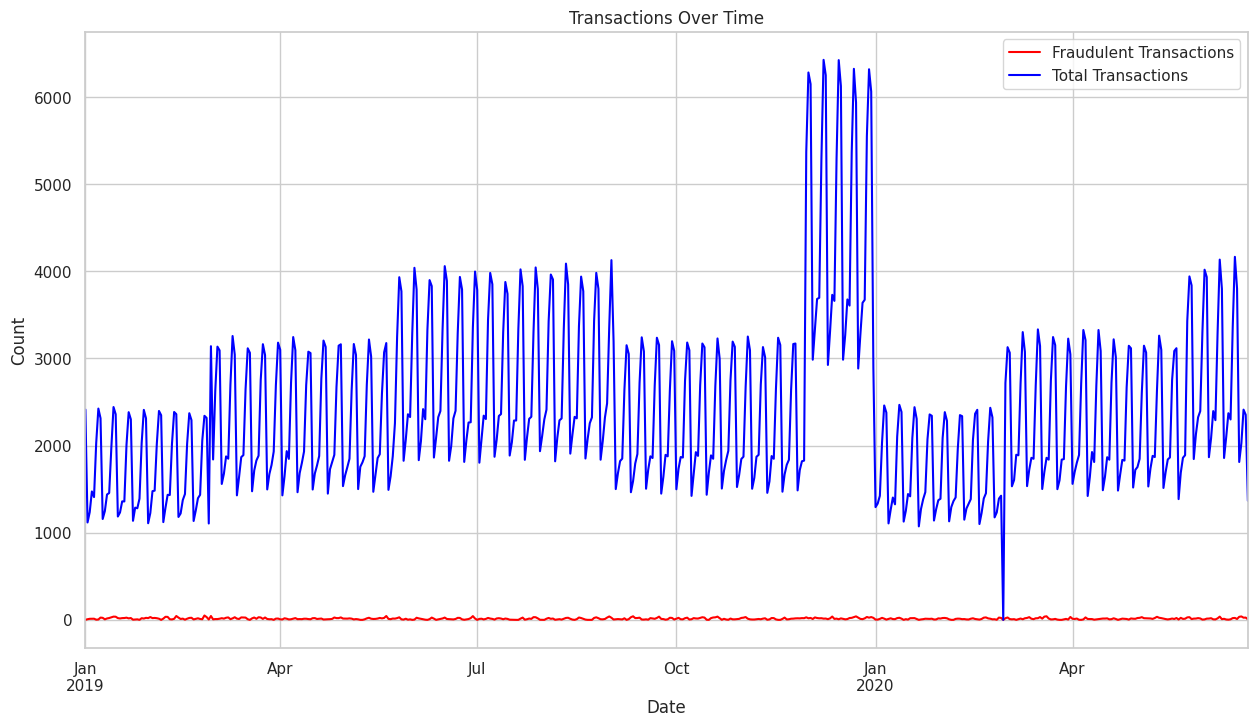

In [84]:
plt.figure(figsize=(15, 8))
df_train.resample('D')['is_fraud'].sum().plot(label='Fraudulent Transactions', color='red')
df_train.resample('D')['is_fraud'].count().plot(label='Total Transactions', color='blue')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

#Fraudulent Transaction Locations

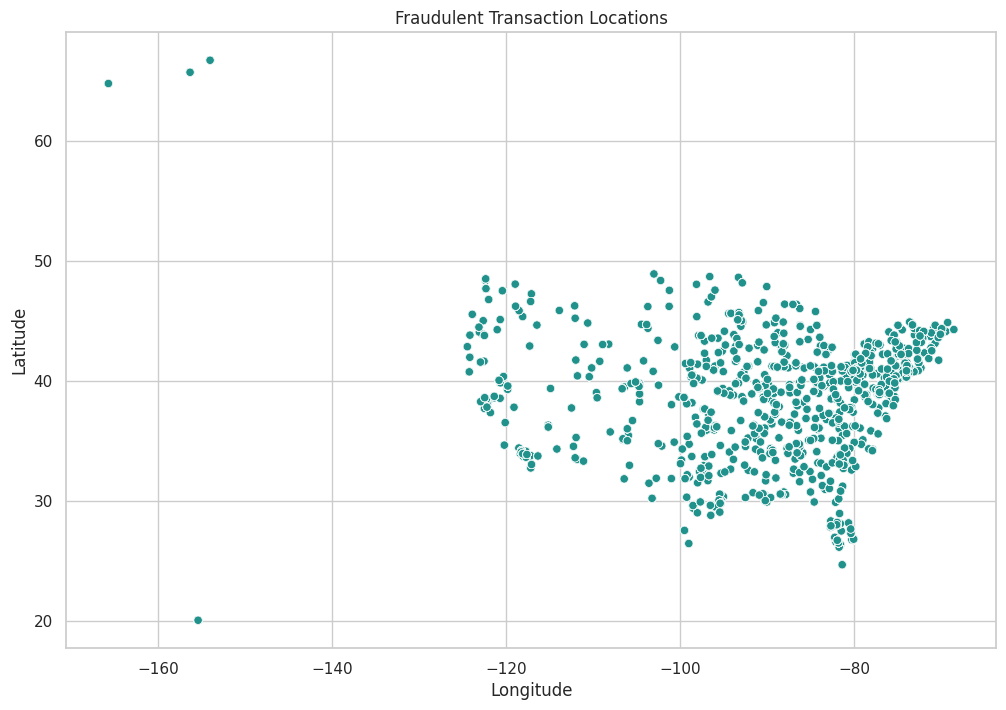

In [85]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_train[df_train['is_fraud'] == 1], x='long', y='lat', hue='is_fraud', palette='viridis', legend=False)
plt.title('Fraudulent Transaction Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [86]:
!pip install scikit-learn
from sklearn.cluster import KMeans

In [87]:
coords = df_train[['lat', 'long']]
merch_coords = df_train[['merch_lat', 'merch_long']]
coords1 = df_test[['lat', 'long']]
merch_coords1 = df_test[['merch_lat', 'merch_long']]

# Fit the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)
kmeans_m = KMeans(n_clusters = 7,random_state = 42).fit(merch_coords)
kmeans1 = KMeans(n_clusters=10, random_state=42).fit(coords1)
kmeans_m1 = KMeans(n_clusters = 7,random_state = 42).fit(merch_coords1)

df_train['location_cluster'] = kmeans.labels_
df_train['location_cluster_merch'] = kmeans_m.labels_
df_test['location_cluster'] = kmeans1.labels_
df_test['location_cluster_merch'] = kmeans_m1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
df_train.drop(columns = ['first','last','cc_num','lat', 'long','merch_lat','merch_long','state','city','trans_num','street','zip','dob'],inplace = True)
df_test.drop(columns = ['first','last','cc_num','lat', 'long','merch_lat','merch_long','state','city','trans_num','street','zip','dob'],inplace = True)

In [89]:
categorical_col = ['job','category','merchant','gender']
numerical_col = ['amt','location_cluster','location_cluster_merch','unix_time','city_pop']
categorical_col , numerical_col

(['job', 'category', 'merchant', 'gender'],
 ['amt',
  'location_cluster',
  'location_cluster_merch',
  'unix_time',
  'city_pop'])

<ipython-input-91-f08ee88bacdd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_train, palette='viridis')
<ipython-input-91-f08ee88bacdd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_train, palette='viridis')
<ipython-input-91-f08ee88bacdd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_train, palette='viridis')
<ipython-input-91-f08ee88bacdd>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_la

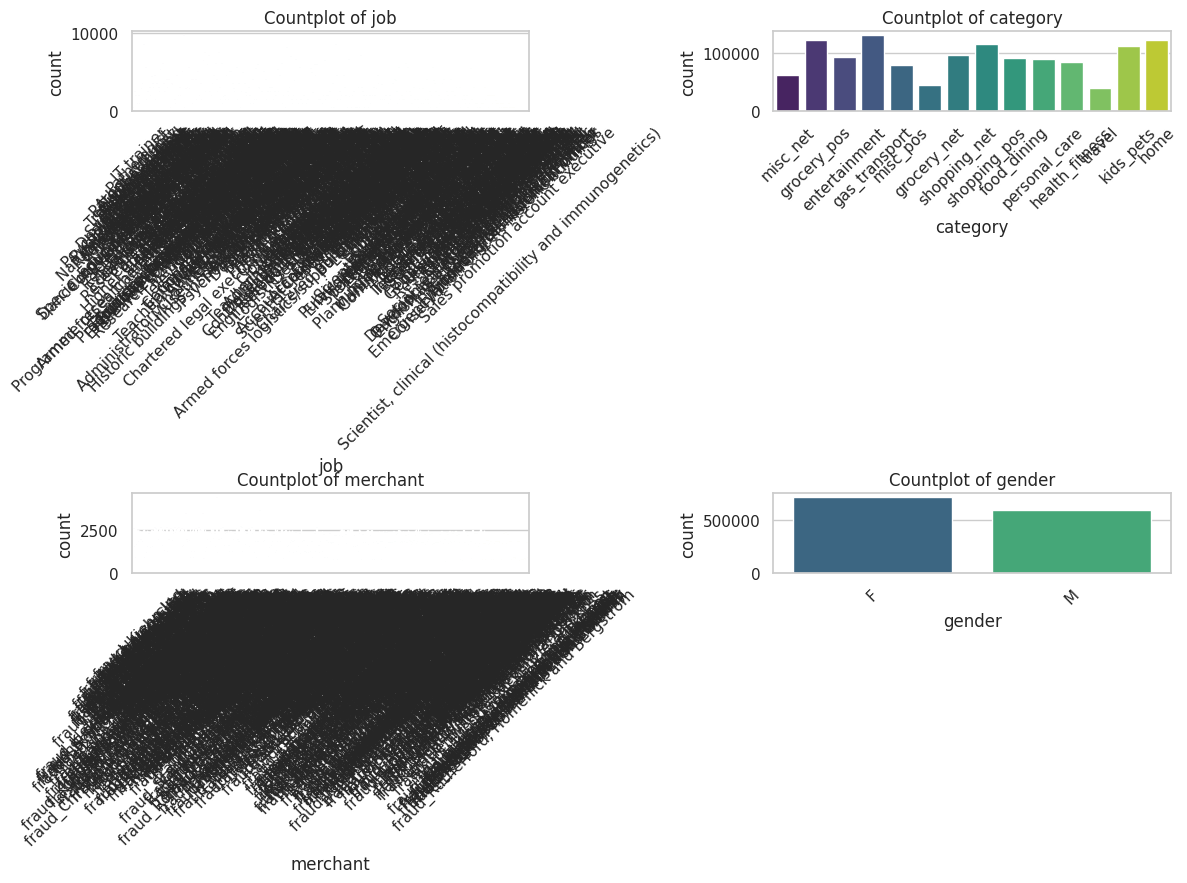

In [91]:

plt.figure(figsize=(12, 6))

# Plotting categorical columns
for i, col in enumerate(categorical_col, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df_train, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()



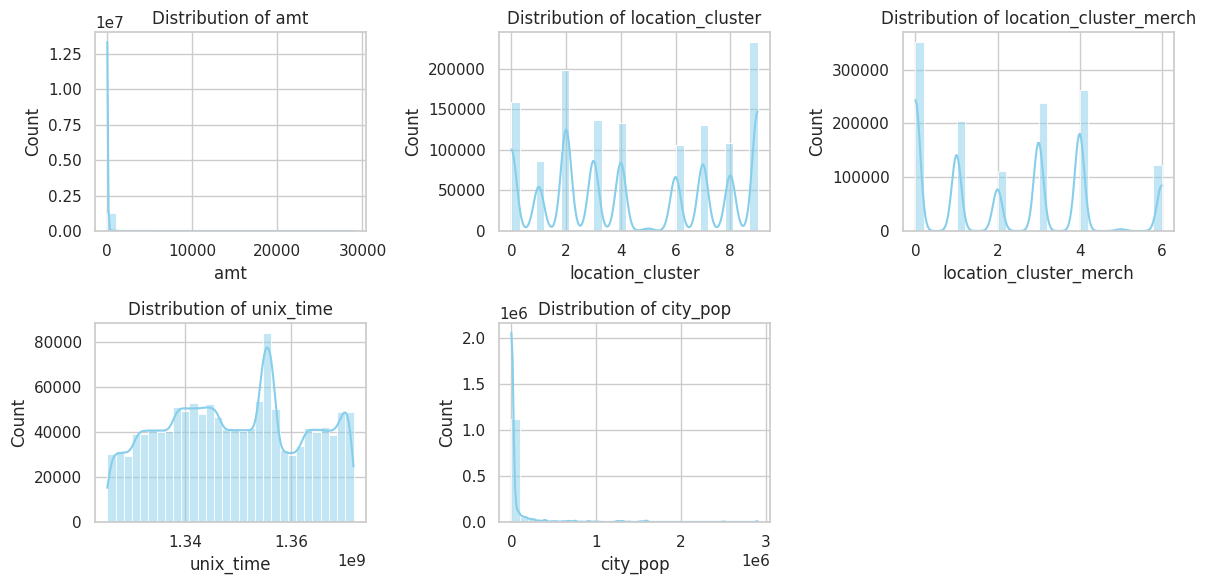

In [93]:
plt.figure(figsize=(12, 6))

# Plotting numerical columns
for i, col in enumerate(numerical_col, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_train[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

In [96]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_col:
  df_train[col] = encoder.fit_transform(df_train[col])
  df_test[col] = encoder.fit_transform(df_test[col])

In [97]:
input_col = numerical_col + categorical_col
target_col = 'is_fraud'

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train[input_col] = scaler.fit_transform(df_train[input_col])
df_test[input_col] = scaler.fit_transform(df_test[input_col])

In [100]:
X = df_train[input_col]
X_test = df_test[input_col]
y = df_train[target_col]
y_test = df_test[target_col]

#Using Ramdom Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state = 42,n_estimators = 10,n_jobs = -1,max_depth = 20)
model_rfc.fit(X, y)

RandomForestClassifier(max_depth=20, n_estimators=10, n_jobs=-1,
                       random_state=42)

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_rfc = model_rfc.predict(X)



# Calculate metrics
accuracy = accuracy_score(y, y_pred_rfc)
precision = precision_score(y, y_pred_rfc)
recall = recall_score(y, y_pred_rfc)
f1 = f1_score(y, y_pred_rfc)

# Display metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9991
Precision: 0.9869
Recall: 0.8613
F1 Score: 0.9198


In [111]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X, y)


LogisticRegression(random_state=42)

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_logreg = model_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9936
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


In [113]:
y_pred_rfc = model_rfc.predict(X)

# Calculate metrics
accuracy_rfc = accuracy_score(y, y_pred_rfc)
precision_rfc = precision_score(y, y_pred_rfc)
recall_rfc = recall_score(y, y_pred_rfc)
f1_rfc = f1_score(y, y_pred_rfc)

# Display metrics
print("RandomForestClassifier Metrics:")
print(f'Accuracy: {accuracy_rfc:.4f}')
print(f'Precision: {precision_rfc:.4f}')
print(f'Recall: {recall_rfc:.4f}')
print(f'F1 Score: {f1_rfc:.4f}')

# Calculate metrics for LogisticRegression
y_pred_logreg = model_logreg.predict(X_test)

# Calculate metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Display metrics
print("\nLogisticRegression Metrics:")
print(f'Accuracy: {accuracy_logreg:.4f}')
print(f'Precision: {precision_logreg:.4f}')
print(f'Recall: {recall_logreg:.4f}')
print(f'F1 Score: {f1_logreg:.4f}')

# Select the best algorithm based on the metrics
if accuracy_rfc > accuracy_logreg:
    print("\nRandomForestClassifier has better accuracy.")
else:
    print("\nLogisticRegression has better accuracy.")

RandomForestClassifier Metrics:
Accuracy: 0.9991
Precision: 0.9869
Recall: 0.8613
F1 Score: 0.9198

LogisticRegression Metrics:
Accuracy: 0.9936
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

RandomForestClassifier has better accuracy.
